In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Para graficar
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
serie_price_original = pd.read_csv("/content/drive/MyDrive/Masters in Data Sciences and Analysis/Semetre 1/Proyecto integrador/^QQQ.csv")
serie_price = serie_price_original.copy()
serie_price_original = serie_price_original[1:]
serie_price['Volume'] = serie_price['Volume']/1000000000 #Volumen en miles de millones
serie_price['rdto'] = (serie_price['Close'] / serie_price['Close'].shift(1) - 1) * 100 #Base 100
serie_limpia = serie_price[['Volume', 'rdto']][1:]
serie_limpia.reset_index(drop = True)
serie_price_original['rdto'] = serie_price['rdto']
serie_price_original.reset_index(drop = True)

serie_price_original = serie_price_original.drop(columns='Adj Close')
serie_price_original.head()

,Date,Open,High,Low,Close,Volume,rdto
1,2014-09-03,4610.140137,4610.140137,4565.379883,4572.560059,1897450000,-0.557391
2,2014-09-04,4581.520020,4603.149902,4553.310059,4562.290039,1728700000,-0.224601
3,2014-09-05,4560.629883,4583.000000,4542.740234,4582.899902,1641830000,0.451744
4,2014-09-08,4579.060059,4600.399902,4570.229980,4592.290039,1670210000,0.204895
5,2014-09-09,4588.830078,4599.029785,4544.439941,4552.290039,1956550000,-0.871025


In [4]:
serie_price_original.describe().round(2)

,Open,High,Low,Close,Volume,rdto
count,1341.00,1341.00,1341.00,1341.00,1.341000e+03,1341.00
mean,6195.66,6227.46,6160.46,6196.54,2.004211e+09,0.05
std,1303.91,1309.22,1296.96,1303.53,3.867717e+08,1.02
min,4133.25,4231.54,4116.60,4213.66,1.494100e+08,-4.43
25%,4981.24,5001.57,4956.23,4982.83,1.774840e+09,-0.38
50%,6070.23,6076.96,6040.71,6055.13,1.950910e+09,0.09
75%,7428.41,7465.39,7381.12,7424.43,2.168620e+09,0.61
max,9049.47,9052.00,8987.32,9022.39,4.534120e+09,5.84


In [5]:
#Matriz correlacion

serie_price_original.corr().round(3)


,Open,High,Low,Close,Volume,rdto
Open,1.000,1.000,1.000,0.999,0.256,0.005
High,1.000,1.000,0.999,1.000,0.262,0.015
Low,1.000,0.999,1.000,1.000,0.244,0.024
Close,0.999,1.000,1.000,1.000,0.251,0.036
Volume,0.256,0.262,0.244,0.251,1.000,-0.166
rdto,0.005,0.015,0.024,0.036,-0.166,1.000


In [6]:
serie_price.corr().round(3)

,Open,High,Low,Close,Adj Close,Volume,rdto
Open,1.000,1.000,1.000,0.999,0.999,0.256,0.005
High,1.000,1.000,0.999,1.000,1.000,0.262,0.015
Low,1.000,0.999,1.000,1.000,1.000,0.245,0.024
Close,0.999,1.000,1.000,1.000,1.000,0.251,0.036
Adj Close,0.999,1.000,1.000,1.000,1.000,0.251,0.036
Volume,0.256,0.262,0.245,0.251,0.251,1.000,-0.166
rdto,0.005,0.015,0.024,0.036,0.036,-0.166,1.000


# Graficas descriptivas univariable#

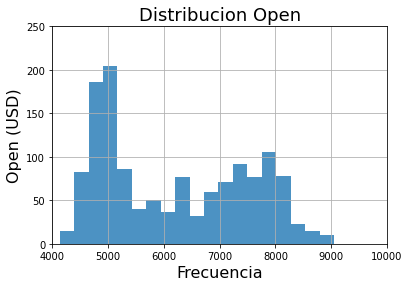

In [7]:
# Para graficar Open, Close, High, Low

bins = np.linspace(serie_price_original['Open'].min(), serie_price_original['Open'].max(), 20)
plt.hist(serie_price_original['Open'], bins,  alpha=0.8, histtype='bar')
plt.xlabel('Frecuencia', Fontsize = 16); plt.xlim(xmin=4000, xmax=10000)
plt.ylabel('Open (USD)', Fontsize = 16); plt.ylim(ymin=0, ymax=250)
plt.title('Distribucion Open', Fontsize = 18)
plt.grid(True)

plt.show()

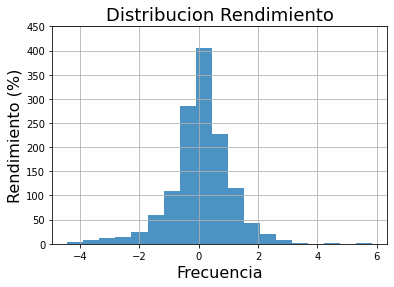

In [8]:
# Para graficar Volume, rdto

bins = np.linspace(serie_price_original['rdto'].min(), serie_price_original['rdto'].max(), 20)
plt.hist(serie_price_original['rdto'], bins,  alpha=0.8, histtype='bar')
plt.xlabel('Frecuencia', Fontsize = 16);
plt.ylabel('Rendimiento (%)', Fontsize = 16); plt.ylim(ymin=0, ymax=450)
plt.title('Distribucion Rendimiento', Fontsize = 18)
plt.grid(True)

plt.show()

In [9]:
from scipy.stats.morestats import anderson
data1 = serie_price_original['rdto']
data2 = serie_price_original['Volume']
results_rdto = anderson(data1)
results_Volume = anderson(data2)


In [10]:
print(results_rdto)


AndersonResult(statistic=15.544864213418123, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [11]:
print(results_Volume)

AndersonResult(statistic=25.785106923835883, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


# PCA por si las moscas #

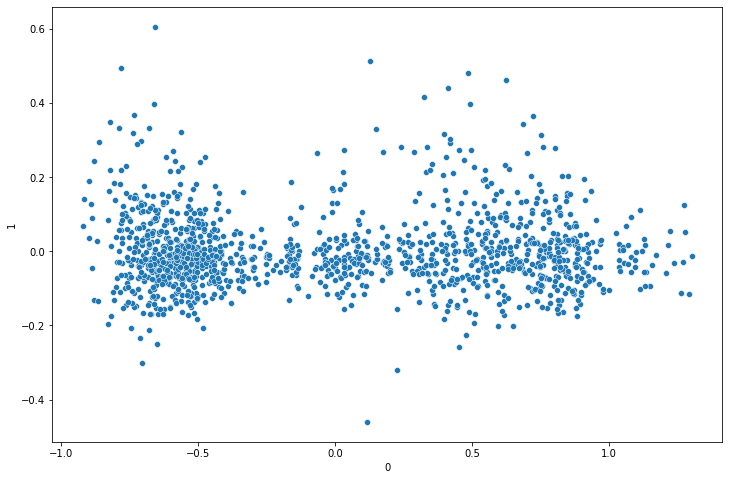

In [12]:
scaler = MinMaxScaler()
escalado = scaler.fit_transform(serie_price.drop('Date', axis = 1).dropna())
pca = PCA(n_components = 2, random_state = 1)
df_v_pca = pca.fit_transform(escalado)
df_visual = pd.DataFrame(df_v_pca)

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_visual , x=0, y=1)

# Analisis data twitter #

In [13]:
df_conteo = pd.read_csv("/content/drive/MyDrive/Masters in Data Sciences and Analysis/Semetre 1/Proyecto integrador/Conteo_twitter.csv")
df_conteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1826 non-null   object
 1   comments  1826 non-null   int64 
 2   retweet   1826 non-null   int64 
 3   likes     1826 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 57.2+ KB


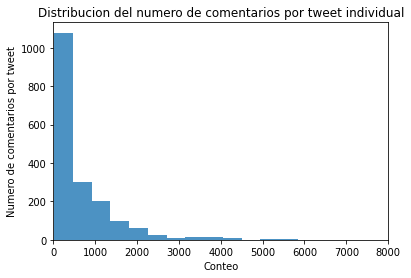

In [14]:
plt.figure

bins = np.linspace(df_conteo['comments'].min(), df_conteo['comments'].max(), 20)
plt.hist(df_conteo['comments'], bins,  alpha=0.8, histtype='bar')
plt.xlabel('Conteo');plt.xlim([0, 8000])
plt.ylabel('Numero de comentarios por tweet')

plt.title('Distribucion del numero de comentarios por tweet individual')
plt.show()

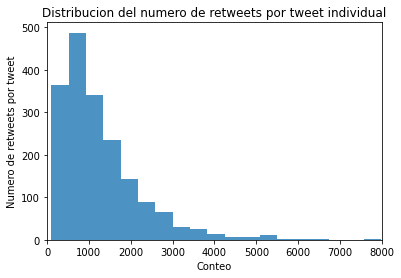

In [15]:
bins = np.linspace(df_conteo['retweet'].min(), df_conteo['retweet'].max(), 20)
plt.hist(df_conteo['retweet'], bins,  alpha=0.8, histtype='bar')
plt.xlabel('Conteo');plt.xlim([0, 8000])
plt.ylabel('Numero de retweets por tweet')
plt.title('Distribucion del numero de retweets por tweet individual')
plt.show()

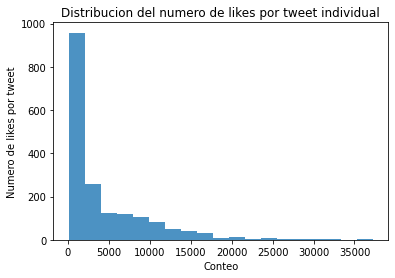

In [16]:
bins = np.linspace(df_conteo['likes'].min(), df_conteo['likes'].max(), 20)
plt.hist(df_conteo['likes'], bins,  alpha=0.8, histtype='bar')
plt.xlabel('Conteo')
plt.ylabel('Numero de likes por tweet')
plt.title('Distribucion del numero de likes por tweet individual')
plt.show()

In [17]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

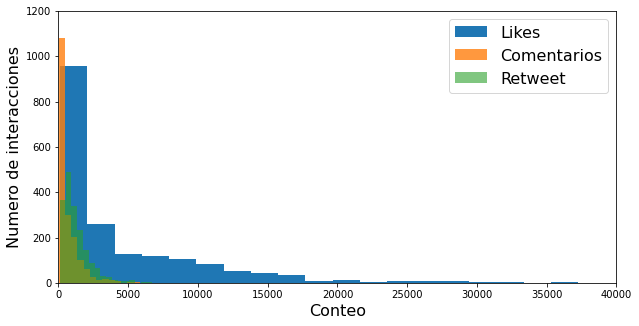

In [20]:
plt.figure(figsize=(10,5))

bins = np.linspace(df_conteo['likes'].min(), df_conteo['likes'].max(), 20)
plt.hist(df_conteo['likes'], bins,  alpha=1, histtype='bar', label='Likes')

bins = np.linspace(df_conteo['comments'].min(), df_conteo['comments'].max(), 20)
plt.hist(df_conteo['comments'], bins,  alpha=0.8, histtype='bar', label='Comentarios')
plt.legend('')


bins = np.linspace(df_conteo['retweet'].min(), df_conteo['retweet'].max(), 20)
plt.hist(df_conteo['retweet'], bins,  alpha=0.6, histtype='bar', label='Retweet')


plt.xlabel('Conteo', fontsize=16); plt.xlim(xmin=0, xmax= 40000)
plt.ylabel('Numero de interacciones', fontsize=16), plt.ylim(ymin=0, ymax= 1200)
# plt.title('Distribucion de likes, comentarios y retweets diaria', fontdict = font)
plt.legend(loc='upper right', fontsize=16)
plt.show()